In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [16]:
train_set = tf.keras.utils.image_dataset_from_directory(directory='archive/images/train/',
                                        # rescale=1./255,
                                        image_size=(28,28),
                                        # image_size=(256,256),
                                        validation_split=0.2,
                                        seed=123,
                                        # class_mode='categorical',
                                        subset='training',
                                        color_mode='grayscale',
                                        batch_size=32)
valid_set = tf.keras.utils.image_dataset_from_directory(directory='archive/images/train/',
                                        # rescale=1./255,
                                        image_size=(28,28),
                                        # image_size=(256,256),
                                        validation_split=0.2,
                                        seed=123,
                                        # class_mode='categorical',
                                        subset='validation',
                                        color_mode='grayscale',
                                        shuffle= False,
                                        batch_size=32)
image_data = tf.keras.utils.image_dataset_from_directory(directory='archive/images/train/',
                                         image_size=(28,28))

Found 13754 files belonging to 1 classes.
Using 11004 files for training.
Found 13754 files belonging to 1 classes.
Using 2750 files for validation.
Found 13754 files belonging to 1 classes.


In [17]:
label = ['human']
idx = 0
class_label = dict()
for i in label:
  class_label[i] = idx
  idx += 1
class_label

{'human': 0}

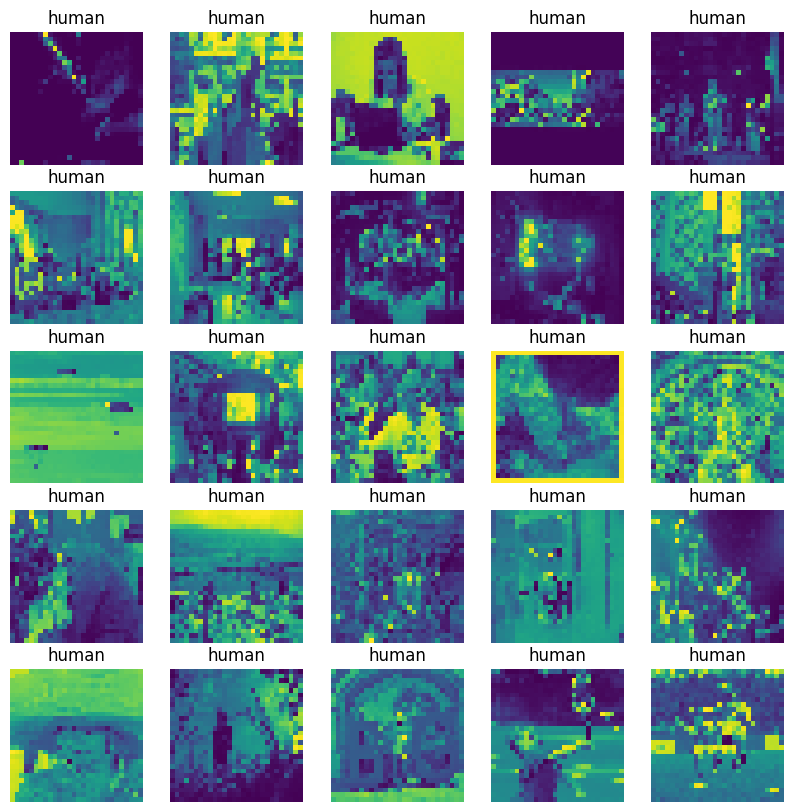

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_set.class_names[labels[i]])
    plt.axis("off")

In [19]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [20]:
model.fit(train_set, epochs=20, batch_size=32, validation_data=valid_set)
# model.fit(train_set, epochs=20, batch_size=32)
# model.fit(train_set_re, train_set.class_indices, epochs=10)
#, valid_set.class_indices
#, validation_data=valid_set
model.save('train_human.h5')

Epoch 1/20
  7/344 [..............................] - ETA: 6s - loss: 5.1128 - accuracy: 0.8482      

InvalidArgumentError: Graph execution error:

jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_3656]